In [1]:
from IPython.display import display, HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

## Objective:
- The objective from this project is to create a <b>Logistic Regression Classifier</b> to predict the <b>Stroke Condition</b>.
- <b>Stoke</b> is a condition in which either the blood flow to the brain stops or blood flow is excessive.
- It is required to obtain <b>ROC > 0.65</b>.

### Data:
- Data is provided in csv format in a file named <b>healthcare-dataset-stroke-data.csv</b>

### Column names and data types are as follow:
- id, integer.
- gender, string.
- age, double.
- hypertension, integer.
- heart_disease, integer.
- ever_married, string.
- work_type, string.
- Residence_type, string.
- avg_glucose_level, double.
- bmi, double.
- smoking_status, string.
- stroke, integer <b>(Target Label)</b>.
If the person has stroke the stroke label value is <b>"1"</b> otherwise <b>"0"</b>.

## To perform this task follow the following guiding steps:

### Create a spark session and import the required libraries

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
import pyspark.sql.functions as fn

spark = SparkSession.builder.getOrCreate()

### Create a data schema programatically

In [3]:
from pyspark.sql.types import *

recordSchema = StructType([StructField('id', IntegerType(), True),
                           StructField('gender', StringType(), True),
                           StructField('age', DoubleType(), True),
                           StructField('hypertension', IntegerType(), True),
                           StructField('heart_disease', IntegerType(), True),
                           StructField('ever_married', StringType(), True),
                           StructField('work_type', StringType(), True),
                           StructField('Residence_type', StringType(), True), 
                           StructField('avg_glucose_level', DoubleType(), True), 
                           StructField('bmi', DoubleType(), True),
                           StructField('smoking_status', StringType(), True), 
                           StructField('stroke', IntegerType(), True)])

### Read the data using the standard DataReader (Key,Value) pairs format
- Provide the schema and any other required options.

In [4]:
df = spark.read.csv("healthcare-dataset-stroke-data.csv", header=True, schema=recordSchema)

### Explore the data 
#### You have to do the following:
- Print the Schema.
- Show the first 10 rows from the data.
- Explore null values and show how many null values in each column.
- Plot a count plot for the target label and <b>notice the graph</b>.
- Perform any additional EDA you find useful.

### <font color='blue'>print schema</font>

In [5]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



### <font color='blue'>Show the first 10 rows from the data</font>

In [6]:
df.show(10)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

### <font color='blue'>Explore null values and show how many null values in each column</font>

In [7]:
for c in df.columns:
    print("No. of missing values in column {} is: {}".format(c, df.select(fn.count(fn.when(fn.isnan(c) | fn.col(c).isNull(), c))).collect()[0][0]))

No. of missing values in column id is: 0
No. of missing values in column gender is: 0
No. of missing values in column age is: 0
No. of missing values in column hypertension is: 0
No. of missing values in column heart_disease is: 0
No. of missing values in column ever_married is: 0
No. of missing values in column work_type is: 0
No. of missing values in column Residence_type is: 0
No. of missing values in column avg_glucose_level is: 0
No. of missing values in column bmi is: 201
No. of missing values in column smoking_status is: 0
No. of missing values in column stroke is: 0


In [8]:
for c in df.columns:
    print("Percentage of missing values in {} is: {:.2f} %".format(c, df.select(fn.count(fn.when(fn.isnan(c) | fn.col(c).isNull(), c))).collect()[0][0] / df.count() * 100))

Percentage of missing values in id is: 0.00 %
Percentage of missing values in gender is: 0.00 %
Percentage of missing values in age is: 0.00 %
Percentage of missing values in hypertension is: 0.00 %
Percentage of missing values in heart_disease is: 0.00 %
Percentage of missing values in ever_married is: 0.00 %
Percentage of missing values in work_type is: 0.00 %
Percentage of missing values in Residence_type is: 0.00 %
Percentage of missing values in avg_glucose_level is: 0.00 %
Percentage of missing values in bmi is: 3.93 %
Percentage of missing values in smoking_status is: 0.00 %
Percentage of missing values in stroke is: 0.00 %


#### <font color='red'>OR</font>

In [9]:
df.select([fn.count(fn.when(fn.isnan(c) | fn.col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|201|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



#### <font color='red'>Comment: </font>bmi contains 201 missing values

### <font color='blue'>Plot a count plot for the target label and notice the graph</font>

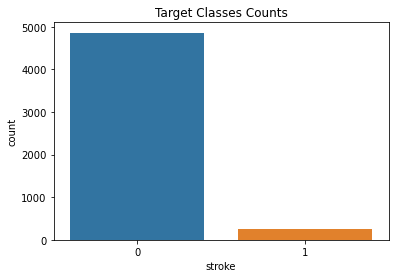

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x="stroke", data=df.toPandas())
ax.set_title('Target Classes Counts')
plt.show()

#### <font color='red'>Comment: </font>There is imbalance between the target classes

### Get the summary statistics of the age column
- You will find the minimum age is about <b>0.08</b>.
- Remove rows for the age below <b>2 years old</b>.

### <font color='blue'>Age summary</font>

In [11]:
df.select('age').summary().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              5110|
|   mean|43.226614481409015|
| stddev| 22.61264672311348|
|    min|              0.08|
|    25%|              25.0|
|    50%|              45.0|
|    75%|              61.0|
|    max|              82.0|
+-------+------------------+



### <font color='blue'>Remove rows for the age below 2 years old</font>

In [12]:
df1 = df.filter(df.age >= 2)

# Test
df1.filter(df.age == 1).show(3)

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



### Working with gender & smoking_status columns:
- Select and show the gender & smoking_status columns
- Get the distinct values for each column.

### <font color='blue'>Select and show the gender & smoking_status columns</font>

In [13]:
df1.select(['gender', 'smoking_status']).show()

+------+---------------+
|gender| smoking_status|
+------+---------------+
|  Male|formerly smoked|
|Female|   never smoked|
|  Male|   never smoked|
|Female|         smokes|
|Female|   never smoked|
|  Male|formerly smoked|
|  Male|   never smoked|
|Female|   never smoked|
|Female|        Unknown|
|Female|        Unknown|
|Female|   never smoked|
|Female|         smokes|
|Female|         smokes|
|  Male|        Unknown|
|Female|   never smoked|
|Female|   never smoked|
|  Male|         smokes|
|  Male|         smokes|
|Female|   never smoked|
|  Male|        Unknown|
+------+---------------+
only showing top 20 rows



### <font color='blue'>Get the distinct values for each column</font>

In [14]:
df.select('gender').distinct().show()

+------+
|gender|
+------+
|Female|
| Other|
|  Male|
+------+



In [15]:
df.select('smoking_status').distinct().show()

+---------------+
| smoking_status|
+---------------+
|         smokes|
|        Unknown|
|   never smoked|
|formerly smoked|
+---------------+



#### Change the string values of the columns into numerical values as follow:
1. Gender column:
    * Male = 1 
    * Female = 0 
    * Other = 0 
2. Smoking Status column:
  * never smoked = 0
  * Unknown = 0.5
  * formerly smoked = 0.75
  * smokes = 1.0


### <font color='blue'>Encoding gender column</font>

In [16]:
# Replace
df2 = df1.replace(['Male', 'Female', 'Other'], ['1', '0', '0'], 'gender')

# Cast to integer
df2 = df2.withColumn("gender",df2.gender.cast('integer'))
df2.show(3)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|     0|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|     1|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
only showing top 3 rows



### <font color='blue'>Encoding smoking_status column</font>

In [17]:
# Replace
df3 = df2.replace(['never smoked', 'Unknown', 'formerly smoked', 'smokes'], ['0.', '0.5', '0.75', '1.'], 'smoking_status')

# Cast to double
df3 = df3.withColumn("smoking_status",df3.smoking_status.cast('double'))
df3.show(3)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|          0.75|     1|
|51676|     0|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|           0.0|     1|
|31112|     1|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|           0.0|     1|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
only showing top 3 rows



#### Show the output DataFrame
- Select and show the gender & smoking_status columns after value changing.
- Print schema for the new dataframe.

### <font color='blue'>Select and show the gender & smoking_status columns after value changing</font>

In [18]:
df3.select(['gender', 'smoking_status']).show()

+------+--------------+
|gender|smoking_status|
+------+--------------+
|     1|          0.75|
|     0|           0.0|
|     1|           0.0|
|     0|           1.0|
|     0|           0.0|
|     1|          0.75|
|     1|           0.0|
|     0|           0.0|
|     0|           0.5|
|     0|           0.5|
|     0|           0.0|
|     0|           1.0|
|     0|           1.0|
|     1|           0.5|
|     0|           0.0|
|     0|           0.0|
|     1|           1.0|
|     1|           1.0|
|     0|           0.0|
|     1|           0.5|
+------+--------------+
only showing top 20 rows



### <font color='blue'>Print schema for the new dataframe</font>

In [19]:
df3.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)



### Deal with null value according to your data analysis.

Since, only `bmi` column contains null values with about 3% of its whole size, which is a small ratio, then we can drop the rows containing null values.

In [20]:
df4 = df3.dropna(how='any', thresh=None, subset=None)

In [21]:
# Test
df4.select([fn.count(fn.when(fn.isnan(c) | fn.col(c).isNull(), c)).alias(c) for c in df4.columns]).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|  0|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



### Split the data into training and test dataframes:
- 80% training and 20% test.
- seed = 42.
- Save each dataframe as a parquet file

In [22]:
train, test = df4.randomSplit([.8,.2],seed=42)

In [23]:
train.write.parquet("Data/train.parquet")
test.write.parquet("Data/test.parquet")

### Read the saved Train and Test DataFrame:
- Use the dataframes you read in the subsequent steps.

In [24]:
train_df = spark.read.parquet("Data/train.parquet")
test_df = spark.read.parquet("Data/test.parquet")

In [25]:
train_df.printSchema()
train_df.show()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)

+---+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
| id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+---+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
| 77|     0|13.0|           0|            0|          No|     children|         Rural|            

In [26]:
test_df.printSchema()
test_df.show()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)

+----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
|  id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
|  91|     0|42.0|           0|            0|          No|      Private|         Urban|        

### Create the model:
- Perform feature engineering steps.
- Create the logistic regression classifier.
- Build the pipeline model that uses all feature engineering steps and the model.
- Train the pipeline model using the trainig dataset.

In [27]:
# Building the pipeline
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer, OneHotEncoder

### <font color='blue'>Data engineering steps</font>

In [28]:
# Encoding 'ever_married'
train_df.select('ever_married').distinct().show()
train_df = train_df.replace(['Yes', 'No'], ['1', '0'], 'ever_married')
train_df = train_df.withColumn("ever_married", train_df.ever_married.cast('integer'))
train_df.show(3)

test_df.select('ever_married').distinct().show()
test_df = test_df.replace(['Yes', 'No'], ['1', '0'], 'ever_married')
test_df = test_df.withColumn("ever_married", test_df.ever_married.cast('integer'))
test_df.show(3)

+------------+
|ever_married|
+------------+
|          No|
|         Yes|
+------------+

+---+------+----+------------+-------------+------------+---------+--------------+-----------------+----+--------------+------+
| id|gender| age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+---+------+----+------------+-------------+------------+---------+--------------+-----------------+----+--------------+------+
| 77|     0|13.0|           0|            0|           0| children|         Rural|            85.81|18.6|           0.5|     0|
| 84|     1|55.0|           0|            0|           1|  Private|         Urban|            89.17|31.5|           0.0|     0|
| 99|     0|31.0|           0|            0|           0|  Private|         Urban|           108.89|52.3|           0.5|     0|
+---+------+----+------------+-------------+------------+---------+--------------+-----------------+----+--------------+------+
only showing 

In [29]:
# Encoding categorical data
categorical_data = ['work_type', 'Residence_type']
oheOutputCols = [x + "_OHE" for x in categorical_data]
indexOutputCols = [x + "_Index" for x in categorical_data]

stringIndexer = StringIndexer(inputCols=categorical_data,
                              outputCols=indexOutputCols,
                              handleInvalid='skip')

oheEncoder = OneHotEncoder(inputCols = indexOutputCols, 
                           outputCols = oheOutputCols)   

In [30]:
# Excluding id and stroke (target) from the input features
input_cols = list(set(df4.columns + oheOutputCols) - set(['id', 'stroke'] + categorical_data))
vecAssembler = VectorAssembler(inputCols=input_cols, outputCol='features')
input_cols

['bmi',
 'hypertension',
 'gender',
 'smoking_status',
 'avg_glucose_level',
 'Residence_type_OHE',
 'age',
 'ever_married',
 'work_type_OHE',
 'heart_disease']

### <font color='blue'>Logistic regression classifier</font>

In [31]:
from pyspark.ml.classification import LogisticRegression

model = LogisticRegression(featuresCol='features',
                           labelCol='stroke',
                           predictionCol='prediction')

### <font color='blue'>Train the pipeline model using the trainig dataset</font>

In [32]:
pipeline = Pipeline(stages=[stringIndexer, oheEncoder, vecAssembler, model]).fit(train_df)

### Perform predictions on tests dataframe:
- Test the model using the test dataframe
- Select and show the feature column.
- Print the schema of the output dataframe.
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   

### <font color='blue'>Test the model</font>

In [33]:
pred = pipeline.transform(test_df)

### <font color='blue'>Select and show the feature column</font>

In [34]:
pred.select('features').show()

+--------------------+
|            features|
+--------------------+
|(13,[0,4,5,6,8],[...|
|(13,[0,3,4,6,8],[...|
|(13,[0,3,4,6,7,8]...|
|(13,[0,2,4,5,6,7,...|
|(13,[0,3,4,5,6,7,...|
|(13,[0,3,4,5,6,7,...|
|(13,[0,3,4,6,11],...|
|(13,[0,3,4,6,11],...|
|(13,[0,4,6,10],[3...|
|(13,[0,3,4,6,11],...|
|(13,[0,3,4,5,6,7,...|
|(13,[0,4,6,8],[37...|
|(13,[0,2,4,5,6,7,...|
|(13,[0,2,3,4,6,11...|
|(13,[0,4,5,6,8],[...|
|(13,[0,3,4,6,7,8]...|
|(13,[0,4,6,7,8],[...|
|[31.7,0.0,1.0,1.0...|
|(13,[0,4,5,6,7,9]...|
|(13,[0,1,3,4,6,7,...|
+--------------------+
only showing top 20 rows



### <font color='blue'>Print the schema of the output dataframe</font>

In [35]:
pred.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: integer (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)
 |-- work_type_Index: double (nullable = false)
 |-- Residence_type_Index: double (nullable = false)
 |-- work_type_OHE: vector (nullable = true)
 |-- Residence_type_OHE: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



### <font color='blue'>Select and show both prediction and label columns</font>

In [36]:
pred.select(['prediction', 'stroke']).filter(fn.col('stroke') == 1).show()

+----------+------+
|prediction|stroke|
+----------+------+
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
+----------+------+
only showing top 20 rows



### <font color='blue'>Count the predicted 1 and 0 values.notice the result</font>

In [37]:
pred.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|  918|
+----------+-----+



#### <font color='red'>Comment: </font>The model only predicts 0.0

### Evaluate the model performance
- Use <b>BinaryClassificationEvaluator</b>. This will calculate the <b>ROC</b>.
- Set the parameters as follow:
    - <b>rawPredictionCol='prediction'</b> and <b>labelCol='stroke'</b>

In [38]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [39]:
evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='stroke')

In [40]:
evaluatorROC.evaluate(pred)

0.5

#### <font color='red'>Comment: </font> 0.5 ROC value indicates a random model

## Improve Model Performance
- You may noticed that <b>the target label is imbalanced</b>.
- LogisticRegression classifier has a special parameter <b>weightCol</b> to deal with imbalanced class.
- In order to use this parameter you must have a <b>weightCol</b> in your training dataframe.
- In order to create this column you will need to define a <b>UDF</b> and apply it to the target label column.
- Create a LogisticRegression classifier with <b>weightCol</b> parameter.
- Build and train a pipeline model with the new LogisticRegression.
- Perform the prediction on the test dataframe. 
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   
- Evaluate the model performance exactly as in the previous step.
#### WE NEED TO OBTAIN  ROC > 0.65
<BR>

### <font color='blue'>UDF</font>

In [41]:
stroke_weight = pred.filter(pred['stroke'] == 1).count() / pred.count()
non_stroke_weight = 1 - stroke_weight

In [42]:
def give_weight(val):
    
    # Give stroke weight for non-stroke class to compensate the imbalance
    if val == 0:
        return stroke_weight
    
    # Give non-stroke weight for stroke class to compensate the imbalance
    else:
        return non_stroke_weight

In [43]:
weightUDF = fn.udf(give_weight, DoubleType())

### <font color='blue'>Adding `weightCol`</font>

In [44]:
train_with_weights = train_df.withColumn('weightCol', weightUDF('stroke'))

In [45]:
train_with_weights.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: integer (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)
 |-- weightCol: double (nullable = true)



In [46]:
train_with_weights.select(['stroke', 'weightCol']).show()

+------+-------------------+
|stroke|          weightCol|
+------+-------------------+
|     0|0.04030501089324619|
|     0|0.04030501089324619|
|     0|0.04030501089324619|
|     0|0.04030501089324619|
|     0|0.04030501089324619|
|     0|0.04030501089324619|
|     1| 0.9596949891067538|
|     0|0.04030501089324619|
|     0|0.04030501089324619|
|     0|0.04030501089324619|
|     0|0.04030501089324619|
|     0|0.04030501089324619|
|     0|0.04030501089324619|
|     0|0.04030501089324619|
|     0|0.04030501089324619|
|     0|0.04030501089324619|
|     0|0.04030501089324619|
|     0|0.04030501089324619|
|     0|0.04030501089324619|
|     0|0.04030501089324619|
+------+-------------------+
only showing top 20 rows



### <font color='blue'>Training the model using weight column</font>

In [47]:
model = LogisticRegression(featuresCol='features',
                           labelCol='stroke',
                           predictionCol='prediction',
                           weightCol='weightCol')

In [48]:
pipeline = Pipeline(stages=[stringIndexer, oheEncoder, vecAssembler, model]).fit(train_with_weights)

In [49]:
pred_W = pipeline.transform(test_df)

### <font color='blue'>Select and show both prediction and label columns</font>

In [50]:
pred_W.select(['prediction', 'stroke']).filter(fn.col('stroke') == 1).show()

+----------+------+
|prediction|stroke|
+----------+------+
|       1.0|     1|
|       1.0|     1|
|       1.0|     1|
|       1.0|     1|
|       1.0|     1|
|       1.0|     1|
|       1.0|     1|
|       1.0|     1|
|       1.0|     1|
|       1.0|     1|
|       1.0|     1|
|       1.0|     1|
|       1.0|     1|
|       1.0|     1|
|       1.0|     1|
|       1.0|     1|
|       1.0|     1|
|       1.0|     1|
|       1.0|     1|
|       1.0|     1|
+----------+------+
only showing top 20 rows



#### <font color='red'>Comment: </font>Now the predicted values matches the actual values better.

### <font color='blue'>Count the predicted 1 and 0 values.notice the result</font>

In [51]:
pred_W.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|  633|
|       1.0|  285|
+----------+-----+



### <font color='blue'>Enhanced model evaluation</font>

In [52]:
evaluatorROC.evaluate(pred_W)

0.8170077000951007